In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

<IPython.core.display.Javascript object>


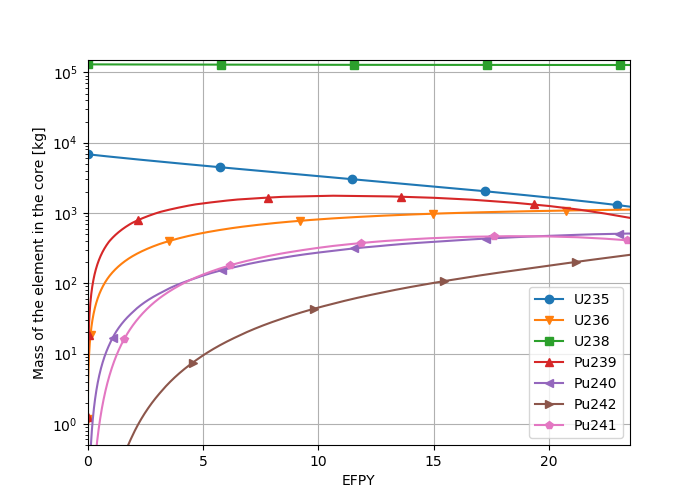

Xe135 before/after 13.621195, 1.089696


In [14]:
import itertools
markers=itertools.cycle(('o','v','s','^','<','>','p','P','*','h','H','+','x','X','D','d','|','_'))

# db_file = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/feed_leu_19.79/db_saltproc.h5'
db_file = '/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/db/3d_10950d_jeff.h5'
step = 3.0/365  # days/year

db = tb.open_file(db_file, mode='r')
# print(db)
#days2 = np.arange(step, (len(k_bds)+1)*(step), step, dtype=np.float64)


fuel_bef_mat = db.root.materials.fuel.before_reproc.parameters
fuel_bef = db.root.materials.fuel.before_reproc.comp
isomap = fuel_bef.attrs.iso_map

fuel_after_mat = db.root.materials.fuel.after_reproc.parameters
fuel_after = db.root.materials.fuel.after_reproc.comp


mass_b = np.array([x['mass'] for x in fuel_bef_mat.iterrows()])
vol_b = np.array([x['volume'] for x in fuel_bef_mat.iterrows()])
dens_b = np.array([x['density'] for x in fuel_bef_mat.iterrows()])

mass_a = np.array([x['mass'] for x in fuel_after_mat.iterrows()])
vol_a = np.array([x['volume'] for x in fuel_after_mat.iterrows()])
dens_a = np.array([x['density'] for x in fuel_after_mat.iterrows()])

days_b = np.array(step*np.arange(len(mass_b)))
days_a = np.arange(step, (len(mass_a)+1)*(step), step, dtype=np.float64)

iso_list = ['Xe135', 'Kr83', 'I135','U235', 'U236', 'U238', 'Pu238','Pu239', 'Pu240', 'Pu241', 'Pu242', 'Am241', 'Am242']
plot_iso = ['U235', 'U236', 'U238','Pu239', 'Pu240', 'Pu242', 'Pu241']
#plot_iso = ['Xe135', 'I135']

mass_b = {}
mass_a = {}
for iso in iso_list:
    mass_b[iso] = np.array([row[isomap[iso]] for row in fuel_bef])
    mass_a[iso] = np.array([row1[isomap[iso]] for row1 in fuel_after])

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax = fig_1.add_subplot(111)
ax.grid(True)
eps = {'Xe135':0.988, 'I135':0.05}

for i in plot_iso:
    m=next(markers)
    ax.semilogy(days_b, 1e-3*mass_b[i], marker=m, markevery=0.2, label=str(i))
    #ax.semilogy(days_b, 1e-3*mass_b[i], label=str(i))
    #ax.semilogy(days_b, mass_b[i], '--', label=str(i)+'(before reprocessing)')
    #ax.semilogy(days_a[1:], mass_a[i], '-', label=str(i)+'(after reprocessing, SaltProc)')
    #ax.semilogy(days_b, (1-eps[i])*mass_b[i],'o',
    #            markerfacecolor="None", markevery=0.1,label=str(i)+'(after reprocessing, expected)')

ax.legend(loc=0)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.set_ylabel('Mass of the element in the core [kg]')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.set_xlim(0, 23.5)
#ax.set_ylim(2e-1, 3e+1)
ax.set_ylim(5e-1, 1.5e+5)
fig_1.show()

db.close()
#fig_1.savefig('/home/andrei2/Desktop/git/job-apps/nlabs/pres/ornl-online-repr/images/tap_u_pu_mass.png',bbox_inches='tight', dpi=900)
#xe_step_removal = (mass_b['Xe135'][1:] - mass_a['Xe135'])/mass_b['Xe135'][1:]
#i_step_removal = (mass_b['I135'][1:] - mass_a['I135'])/mass_b['I135'][1:]
# print("Xe-135 removal efficiency ", xe_step_removal)
# print("I-135 removal efficiency ", i_step_removal)
#print('U238 dynamics %f, %f' %(1e-6*mass_a['U238'][0],1e-6*mass_a['U238'][-1]))
print('Xe135 before/after %f, %f' %(mass_b['Xe135'][-1],mass_a['Xe135'][-1]))